<a href="https://colab.research.google.com/github/Mehul-Agrawal410/AgentJackie_WiDS_2023/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Arm:
    def __init__(self, p):
        self.p = p

    def pull(self):
        return np.random.binomial(1, self.p)

class MultiBandit:
    def __init__(self, probs = [0.1, 0.2, 0.7, 0.5]):
        self.__arms = [Arm(p) for p in probs]
        self.__regret = 0
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        reward = self.__arms[arm_num].pull()
        self.__regret += self.__maxp-self.__arms[arm_num].p
        return reward

    def regret(self):
        return self.__regret

In [ ]:
class EpsilonGreedyAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.epsilon = epsilon                      # epsiolon value for the algorithm
        self.timestep = 0                           # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        return np.argmax(self.arm_rewards / self.arm_pulls)

    def select_arm(self):
        # Select arm at each time step. You are supposed to return the index of which
        # arm has been selected to pull at this timestep
        if np.random.rand() < self.epsilon:
            selected_arm = np.random.choice(self.num_arms)
        else:
            selected_arm = np.argmax(self.arm_rewards / self.arm_pulls)
        return selected_arm

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1            # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        plt.plot(self.regrets)
        plt.xlabel("Time steps")
        plt.ylabel("Total regret")
        plt.show()

<ipython-input-3-894c43230470>:22: RuntimeWarning: invalid value encountered in divide
  selected_arm = np.argmax(self.arm_rewards / self.arm_pulls)


Total Regret after 100 timesteps: 7.300000000000001 with assumed best arm 2


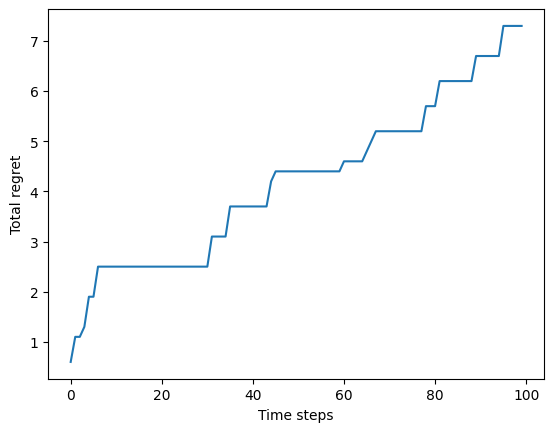

In [ ]:
# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

# Create  Algorithm instance
algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=H, epsilon=0.2)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [ ]:
class UCBAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.ucb_val = np.zeros(num_arms)
        self.timestep = 0                           # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        return np.argmax(self.arm_rewards / self.arm_pulls)

    def select_arm(self):
        # Select arm at each time step. You are supposed to return the index of which
        # arm has been selected to pull at this timestep
        if self.timestep < self.num_arms:
            selected_arm = self.timestep
        else:
            selected_arm = np.argmax(self.ucb_val)
        return selected_arm

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1            # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep

            for arm in range(self.num_arms):
              if self.arm_pulls[arm] > 0:
                  mean_reward = self.arm_rewards[arm] / self.arm_pulls[arm]
                  exploring_bonus = np.sqrt((2 * np.log(self.timestep)) / self.arm_pulls[arm])
                  self.ucb_val[arm] = mean_reward + exploring_bonus
              else:
                  self.ucb_val[arm] = float('inf')

            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep

    def plot(self):
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        plt.plot(self.regrets)
        plt.xlabel("Time steps")
        plt.ylabel("Total regret")
        plt.show()

Total Regret after 100 timesteps: 17.399999999999988 with assumed best arm 2


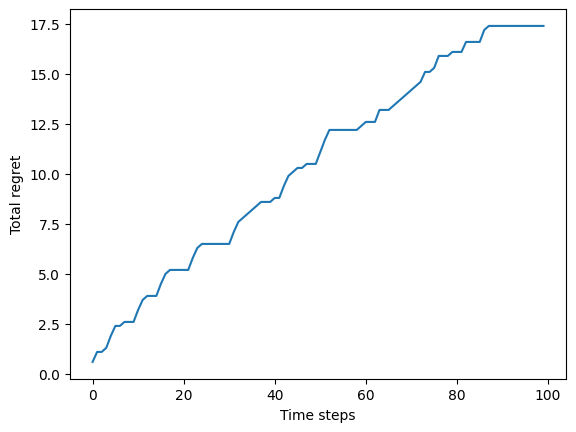

In [ ]:
# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

# Create  Algorithm instance
algorithm = UCBAlgorithm(num_arms=bandit.num_arms(), horizon=H, epsilon=0.2)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [ ]:
class ThompsonSamplingAlgorithm:
    def __init__(self, num_arms, horizon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.timestep = 0
        self.arm_successes = np.zeros(num_arms)
        self.arm_failures = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)

    def give_best_arm(self):
        return np.argmax(self.arm_successes / (self.arm_successes + self.arm_failures))

    def select_arm(self):
        sampled_values = np.random.beta(self.arm_successes + 1, self.arm_failures + 1)
        selected_arm = np.argmax(sampled_values)
        return selected_arm

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            if reward == 1:
                self.arm_successes[arm_to_pull] += 1
            else:
                self.arm_failures[arm_to_pull] += 1
            self.timestep += 1
            self.regrets[_] = bandit.regret()

    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel("Time steps")
        plt.ylabel("Total regret")
        plt.show()

Total Regret after 100 timesteps: 9.100000000000001 with assumed best arm 2


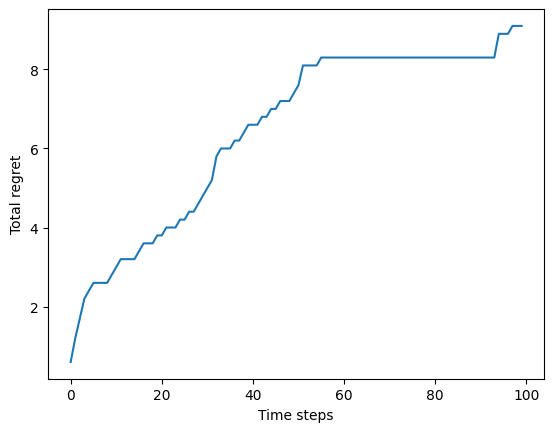

In [ ]:
# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

# Create  Algorithm instance
algorithm = ThompsonSamplingAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

<ipython-input-3-894c43230470>:22: RuntimeWarning: invalid value encountered in divide
  selected_arm = np.argmax(self.arm_rewards / self.arm_pulls)


Epsilon greedy: Total Regret after 1000 timesteps: 89.20000000000006 with assumed best arm 2


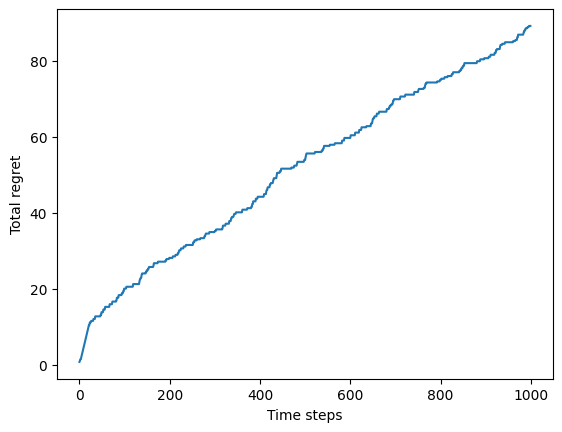

UCB: Total Regret after 1000 timesteps: 70.09999999999988 with assumed best arm 2


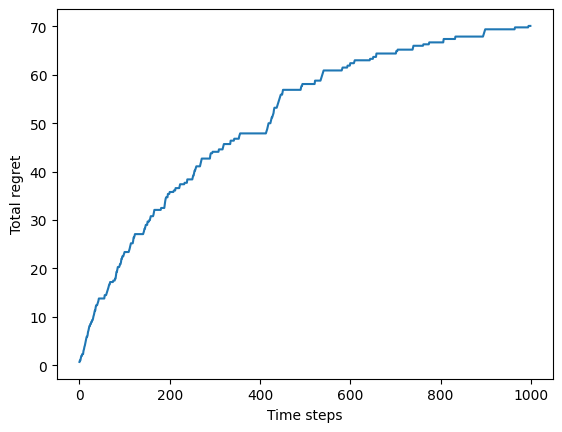

Thompson sampling: Total Regret after 1000 timesteps: 26.700000000000006 with assumed best arm 2


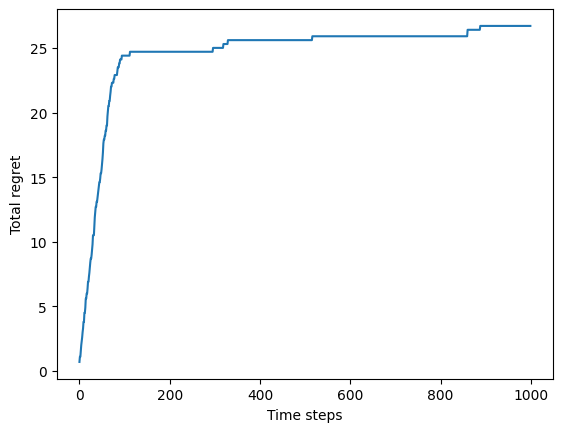

In [ ]:
probabilities = [0.1, 0.5, 0.8, 0.3, 0.4]
H = 1000
E = 0.2

eg_bandit = MultiBandit(probabilities)
eg = EpsilonGreedyAlgorithm(num_arms=eg_bandit.num_arms(), horizon=H, epsilon = E)
eg.run_algorithm(eg_bandit)
print(f"Epsilon greedy: Total Regret after {H} timesteps: {eg_bandit.regret()} with assumed best arm {eg.give_best_arm()}")
eg.plot()

ucb_bandit = MultiBandit(probabilities)
ucb = UCBAlgorithm(num_arms=ucb_bandit.num_arms(), horizon=H, epsilon=E)
ucb.run_algorithm(ucb_bandit)
print(f"UCB: Total Regret after {H} timesteps: {ucb_bandit.regret()} with assumed best arm {ucb.give_best_arm()}")
ucb.plot()

ts_bandit = MultiBandit(probabilities)
ts = ThompsonSamplingAlgorithm(num_arms=ts_bandit.num_arms(), horizon=H)
ts.run_algorithm(ts_bandit)
print(f"Thompson sampling: Total Regret after {H} timesteps: {ts_bandit.regret()} with assumed best arm {ts.give_best_arm()}")
ts.plot()

For same parameters, we observe that Thompson sampling algorithm gives lowest regret, so we can conclude that Thompson sampling is the best one. Followed by UCB